In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro,kstest,normaltest
import scipy.stats as sts
import statsmodels.api as sm

## 1) Problem Statement

In [2]:
To predict SepalLengthCm values from other independent variables

Independent Variables
 epalWidthCm	PetalLengthCm	PetalWidthCm	Species
    
Dependent Variable
SepalLengthCm

SyntaxError: invalid syntax (<ipython-input-2-46745734fab3>, line 1)

In [10]:
df = pd.read_csv("Iris.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Iris.csv'

In [ ]:
low medium High
0    1      2

Dimploma   B-Tech   M-tech  PhD

cng  petrol 

## 3) EDA

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
df.shape

In [ ]:
df.columns

## 3.1 ID

In [ ]:
df["Id"].nunique() # student id Employees Id  Drop

## 3.2 SepalWidthCm

In [ ]:
df["SepalWidthCm"].value_counts()

In [ ]:
sns.displot(df["SepalWidthCm"])

In [ ]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(df["SepalWidthCm"])

In [ ]:
sns.boxplot(df["SepalWidthCm"])

In [ ]:
df[["SepalWidthCm"]].boxplot()

## species

In [ ]:
df["Species"].value_counts()  # we can replace or Encoding

## 4 Feature Engineering

In [ ]:
df.drop("Id",axis=1,inplace=True)

In [ ]:
df["Species"].replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2},inplace=True)

In [ ]:
df.tail(1)

## 5. Feature selection

In [ ]:
df.corr()

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
sns.pairplot(df)

In [3]:
df.plot(x ="PetalLengthCm",y="SepalLengthCm",kind="scatter")

NameError: name 'df' is not defined

## Multicolinearity

In [ ]:
1.Scatter plot
2.Correlation matrix
3.Vif 

It is one of the method to detect multicolinearity


Weight   Horse Power  Price
Market Capital  Growth

In [4]:
vif = pd.DataFrame()
df1 = df.drop("SepalLengthCm",axis=1)
vif["Feature"]  =  df1.columns
vif["Vif Factor"] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif

NameError: name 'df' is not defined

## Train test split

In [5]:
df.head(1)

NameError: name 'df' is not defined

In [6]:
x = df.drop("SepalLengthCm",axis=1)
y = df["SepalLengthCm"]
y

NameError: name 'df' is not defined

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=45)

NameError: name 'x' is not defined

In [8]:
x_train.shape

NameError: name 'x_train' is not defined

## Model Training

In [41]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [1]:
# lr_model.intercept_

In [2]:
# lr_model.coef_

## Evaluation

In [44]:
y_pred = lr_model.predict(x_test)
y_pred

array([5.0041907 , 5.00280313, 6.91467857, 4.82611424, 4.86485553,
       5.501801  , 4.60882036, 7.33528244, 5.95494797, 6.51488701,
       4.94047439, 7.11820619, 5.82682156, 6.61990211, 6.28846572,
       4.65946419, 6.18275683, 6.06978426, 4.88866063, 5.81347483,
       6.25879523, 6.47491918, 6.38697824, 6.38622785, 5.06790701,
       6.49060577, 5.7362099 , 5.5814624 , 5.20841211, 6.3743253 ])

In [3]:
# residual = y_test - y_pred
# residual

In [4]:
# x_test

In [48]:
x_test.iloc[0:1]

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3.5,1.4,0.2,0


In [49]:
x_test[0:1]

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3.5,1.4,0.2,0


In [51]:
x_test.loc[0]

SepalWidthCm     3.5
PetalLengthCm    1.4
PetalWidthCm     0.2
Species          0.0
Name: 0, dtype: float64

In [52]:
y_pred = lr_model.predict(x_test[0:1])
y_pred

array([5.0041907])

In [54]:
y_pred = lr_model.predict(x_test[0:3])
y_pred

array([5.0041907 , 5.00280313, 6.91467857])

In [55]:
y_pred = lr_model.predict(x_test)
y_pred

array([5.0041907 , 5.00280313, 6.91467857, 4.82611424, 4.86485553,
       5.501801  , 4.60882036, 7.33528244, 5.95494797, 6.51488701,
       4.94047439, 7.11820619, 5.82682156, 6.61990211, 6.28846572,
       4.65946419, 6.18275683, 6.06978426, 4.88866063, 5.81347483,
       6.25879523, 6.47491918, 6.38697824, 6.38622785, 5.06790701,
       6.49060577, 5.7362099 , 5.5814624 , 5.20841211, 6.3743253 ])

In [57]:
def get_predict_sepal_length(SepalWidthCm,PetalLengthCm,PetalWidthCm,Species):
    df_1 = pd.DataFrame({"SepalWidthCm":[SepalWidthCm],
                        "PetalLengthCm":[PetalLengthCm],
                        "PetalWidthCm":[PetalWidthCm],
                        "Species":[Species]})
    y_pred_new = lr_model.predict(df_1)
    
    return y_pred_new

get_predict_sepal_length(3.5,1.4,0.3,0)

array([4.96544941])

## Assumption of Normality

In [ ]:
Normality of Residual

1.kdeplot() # density plot
2.Hypoithesis testing
   1.shapiro test
   2.kstest
   3.normality test
3. qq-plot

## kdeplot()

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Density'>

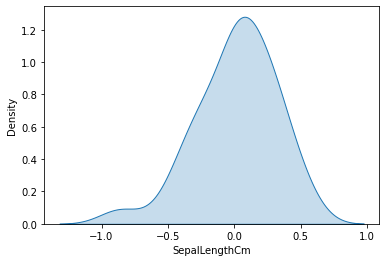

In [59]:
sns.kdeplot(residual,fill=True)

## Hypothesis Testing to check Normality

In [ ]:
1.shapiro test
2.kstest
3.normality test


0.05  is significance value in hypotheis testing
p_value  >= 0.05   >>  we are accepting Null hypotheis  
P_value  < 0.05 >>>  we are accepting alternate hypothesis

## 1.shapiro test

In [61]:
_,p_value = shapiro(residual)
print("P_value",p)
if p_value >= 0.05:
    print("Data is normaly distributed")
else:
    print("Data is not normaly distributed")

Data is normaly distributed


## 2.Normal test

In [63]:
_,p_value = normaltest(residual)
print("P_value",p_value)
if p_value >= 0.05:
    print("Data is normaly distributed")
else:
    print("Data is not normaly distributed")

P_value 0.09051734284524263
Data is normaly distributed


## 3.kstest

In [64]:
_,p_value = kstest(residual,"norm")
print("P_value",p_value)
if p_value >= 0.05:
    print("Data is normaly distributed")
else:
    print("Data is not normaly distributed")

P_value 0.006230563955440971
Data is not normaly distributed


## QQ-PLOT

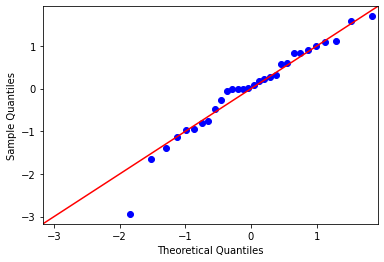

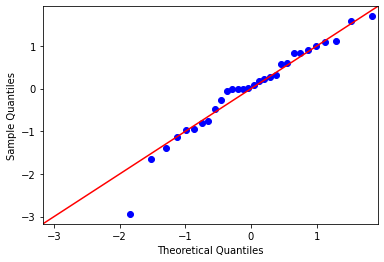

In [66]:
sm.qqplot(residual,line="45",dist = sts.norm,fit=True)

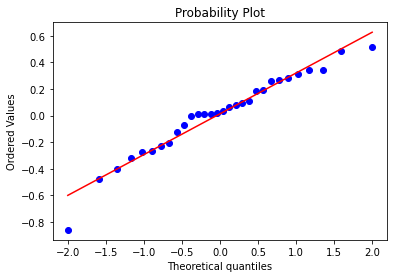

In [68]:
sts.probplot(residual,dist="norm",plot=plt)
plt.show()

## Assumption of Homoscedascity

In [ ]:
The assumption of equal variance
 >> Residual term should be in specific range for all independent variable

<AxesSubplot:ylabel='SepalLengthCm'>

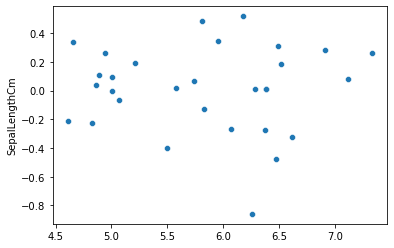

In [69]:
00sns.scatterplot(y_pred,residual)

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalLengthCm'>

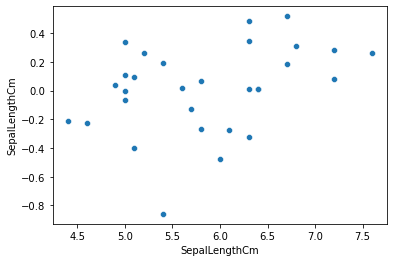

In [70]:
sns.scatterplot(y,residual)

## Evaluation

## Train Data 

In [74]:
y_pred_train = lr_model.predict(x_train)

MSE = mean_squared_error(y_train,y_pred_train)
print("MSE for training dataset",MSE)

rmse = np.sqrt(MSE) # if too high scale data is avaialbe then use rmse
print("rmse on training dataset",rmse)
r2value = r2_score(y_train,y_pred_train)
print("R2 value ",r2value)
adj_r1 =  1 - (((1-r2value)*(x_train.shape[0] - 1 ))/(x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R score",adj_r1)

MSE for training dataset 0.09538476015824712
rmse on training dataset 0.30884423283954504
R2 value  0.8606074689987621
Adjusted R score 0.8557590331378495


## Test Data

In [75]:
y_pred_test = lr_model.predict(x_test)

MSE = mean_squared_error(y_test,y_pred_test)
print("MSE for training dataset",MSE)

rmse = np.sqrt(MSE) # if too high scale data is avaialbe then use rmse
print("rmse on training dataset",rmse)
r2value = r2_score(y_test,y_pred_test)
print("R2 value ",r2value)
adj_r1 =  1 - (((1-r2value)*(x_test.shape[0] - 1 ))/(x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R score",adj_r1)

MSE for training dataset 0.08831823985977348
rmse on training dataset 0.2971838485849685
R2 value  0.8678771698046972
Adjusted R score 0.8467375169734488
